In [1]:
import numpy as np
import sys
sys.path.append('..')
import matplotlib.pyplot as plt

In [2]:
def read_mask(maskdir,maskname,subfac):
    mask = np.load(maskdir+maskname).astype(int)
    mask = mask[::subfac]
    return mask

In [14]:
subfac = 1000

In [16]:
# load the skewers x 

# set sim_name
sim_name='sim_pair_30' # other version will be 'diffSeed'
sim_dir='central'
snap_num = 6
# set phase
phase = "sim_minus"
# set axis number
axis = 1


system='PIC'
if system=='PIC':
    meas_path = "/data/desi/common/HydroData/Emulator/post_768/"
    delta_x = np.load(meas_path+"/delta_x/central/skewers_{:d}_p{:s}_ax{:d}_Ns768_wM0.05_sT1.0_sg1.0.npz".format(snap_num, phase, axis))
elif system=='home':
    meas_path = "/Users/mlokken/research/lyman_alpha/data/"
    delta_x = np.load(meas_path+"snap_{:d}/delta_x/skewers_{:d}_p{:s}_ax{:d}_Ns768_wM0.05_sT1.0_sg1.0.npz".format(snap_num, phase, axis))

delta_flux_x = (delta_x['delta_flux_x']).astype(np.float32)
xpar = delta_x['xpar']
L = delta_x['L']
delta_x.close()


delta_flux_x = delta_flux_x[::subfac]

In [17]:
# read the masks

maskdir = "/data/desi/scratch/mlokken/masking/"
masks = []

random_mask  = read_mask(maskdir,'random_mask.npy',subfac)
skyline_mask = read_mask(maskdir,'skyline_mask.npy',subfac)
skyline_2mask = read_mask(maskdir,'double_skyline_mask.npy',subfac)
dla_mask = read_mask(maskdir,'dla_mask.npy',subfac)
dla_mask_small = read_mask(maskdir,'dla_small_mask.npy',subfac)


In [18]:
delta_flux_2skyline = skyline_2mask * delta_flux_x
delta_flux_skyline  = skyline_mask * delta_flux_x
delta_flux_randmask = random_mask * delta_flux_x
delta_flux_dla      = dla_mask * delta_flux_x
delta_flux_dla_small = dla_mask_small * delta_flux_x

In [22]:
Np = delta_flux_2skyline.shape[1]
L = 67.5
pix_spacing = L/Np

In [20]:
# match the total number of pixels masked to what is necessary for the skyline version
skyline_width = 30
Npm_per_skew = skyline_width
boxdiv = 4
masks_exist = True
double_skyline_width = int(skyline_width//2)
print("double skyline width", double_skyline_width)
double_skyline_distance = 125
double_sky_maskrange = np.arange(int(Np//boxdiv), int(Np//boxdiv)+double_skyline_width)
sky_maskrange = np.arange(Np//boxdiv, Np//boxdiv+skyline_width)
dla_width = 400
dla_width_small = 40

double skyline width 15


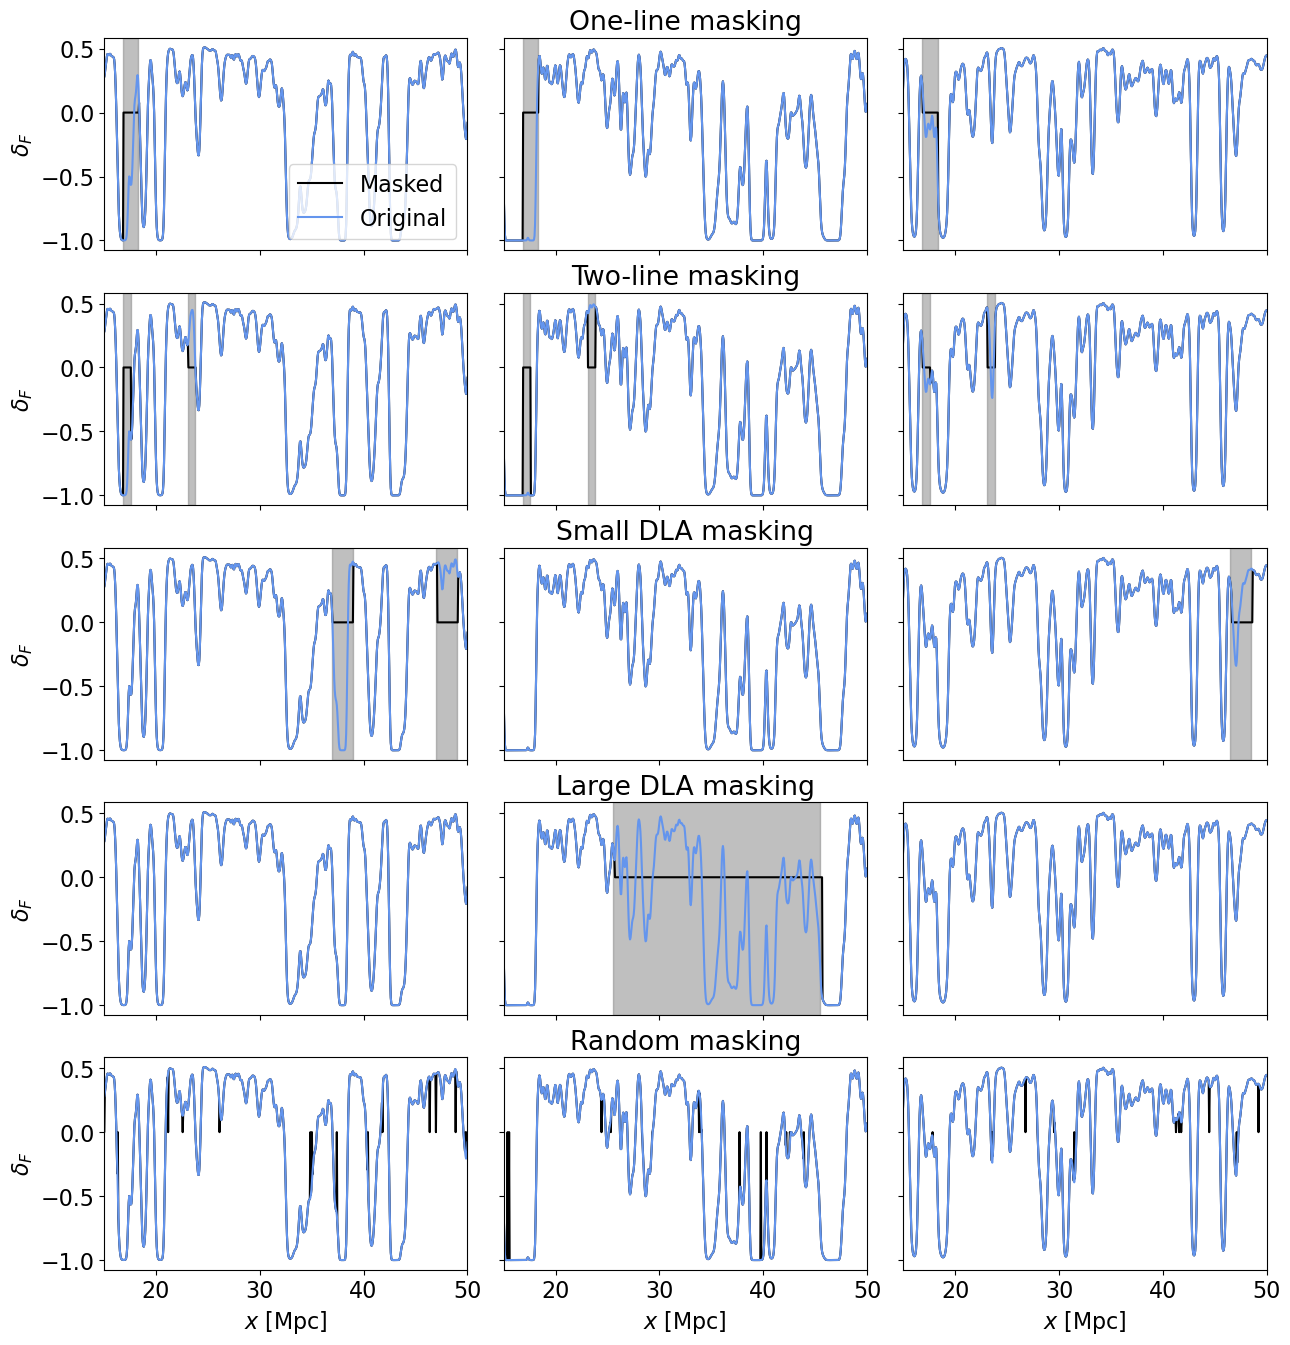

In [57]:
plotmode = 'twol'

# check a few spectra in each
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(5, 3, figsize=(15, 16), sharey=True, sharex=True)
for axj in range(ax.shape[0]):
    
    for axi,i in enumerate([0,51,125]):
        # ax[axi].plot(xpar, delta_flux_dla[i, :], label='Masked', linestyle='dashed')
        
        
        if axj==0:
            ax[axj,axi].plot(xpar, delta_flux_skyline[i, :], label='Masked', color='black')
            ax[axj,axi].plot(xpar, delta_flux_x[i, :], label='Original', color='cornflowerblue')
            ax[axj,axi].axvspan(sky_maskrange[0]*pix_spacing, sky_maskrange[-1]*pix_spacing, alpha=0.5, color='grey')
            if axi==1:
                ax[axj,axi].set_title("One-line masking")
        elif axj==1:
            ax[axj,axi].plot(xpar, delta_flux_2skyline[i, :], label='Masked', color='black')
            ax[axj,axi].plot(xpar, delta_flux_x[i, :], label='Original', color='cornflowerblue')
            ax[axj,axi].axvspan(double_sky_maskrange[0]*pix_spacing, double_sky_maskrange[-1]*pix_spacing, alpha=0.5, color='grey')
            ax[axj,axi].axvspan(double_sky_maskrange[0]*pix_spacing+double_skyline_distance*pix_spacing, double_sky_maskrange[-1]*pix_spacing+double_skyline_distance*pix_spacing, alpha=0.5, color='grey')
            if axi==1:
                ax[axj,axi].set_title("Two-line masking")
        elif axj==2:
            ax[axj,axi].plot(xpar, delta_flux_dla_small[i, :], label='DLA', color='black')
            ax[axj,axi].plot(xpar, delta_flux_x[i, :], label='Original', color='cornflowerblue')
            if axi==0:
                ax[axj,axi].axvspan(37, 37+dla_width_small*pix_spacing, alpha=0.5, color='grey')
                ax[axj,axi].axvspan(47, 47+dla_width_small*pix_spacing, alpha=0.5, color='grey')
            elif axi==1:
                ax[axj,axi].set_title("Small DLA masking")
            elif axi==2:
                ax[axj,axi].axvspan(46.5, 46.5+dla_width_small*pix_spacing, alpha=0.5, color='grey')
                
        elif axj==3:
            ax[axj,axi].plot(xpar, delta_flux_dla[i, :], label='DLA', color='black')
            ax[axj,axi].plot(xpar, delta_flux_x[i, :], label='Original', color='cornflowerblue')
            if axi==1:
                ax[axj,axi].axvspan(25.5, 25.5+dla_width*pix_spacing, alpha=0.5, color='grey')
                ax[axj,axi].set_title("Large DLA masking")
        elif axj==4:
            ax[axj,axi].plot(xpar, delta_flux_randmask[i, :], label='random', color='black')
            ax[axj,axi].plot(xpar, delta_flux_x[i, :], label='Original', color='cornflowerblue')
            if axi==1:
                ax[axj,axi].set_title("Random masking")
        ax[axj,axi].set_xlim(15,50)
        ax[4,axi].set_xlabel("$x$ [Mpc]")
    ax[axj,0].set_ylabel(r'$\delta_F$')        
ax[0,0].legend(loc='lower right')

plt.subplots_adjust(wspace=0.1, hspace=.2)
plt.savefig("../plots/mask_visuals.pdf", bbox_inches='tight')


In [ ]:
def get_3d_visual(mask):
    # visualize the masks
    cm = plt.cm.jet
    # 1: plot a 3D cube showing the masked pixel locations
    fig = plt.figure(figsize=[10,6])
    ax = fig.add_subplot(111, projection='3d')
    
    counter = 0
    for i in range(0, nside, 100):
        for j in range(0, nside, 100): # only plot every 10th column
            # get a random color for this line of pixels
            color = cm((counter*10)%100)
            if counter<300:
                masklocs = masklocs_per_skewer[i*nside+j]
                # plot a line of light grey pixels
                ax.scatter(i*np.ones(Np), np.arange(Np), j*np.ones(Np), c='lightgrey', s=2)
                # fill in the masked pixels for this line with black
                ax.scatter(i*np.ones(len(masklocs)), masklocs, j*np.ones(len(masklocs)), c='k', s=10)
                counter +=1
            else:
                break
    ax.set_xlabel('x')
    ax.set_ylabel('pixels')
    ax.set_zlabel('y')
    plt.title("Random masking of 1-5 pixels in each skewer")